In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
from catboost import CatBoostRegressor

from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,KFold
from sklearn.feature_selection import RFE


In [2]:
titanic=pd.read_csv("modifiedtrain.csv") 
#titanic1=pd.read_csv("modified_features_train.csv") 

#Loading dataset from the csv file into "Pandas Dataframe"
titanic.head() 

def getNumber(str):
    if str=="S":
        return 1
    elif str=="Q":
        return 2
    else:
        return 3
titanic["embarked"]=titanic["Embarked"].apply(getNumber)
#We have created a new column called "gender" and 
#filling it with values 1 ,2 based on the values of sex column
titanic.head()
del titanic['Embarked']
#del titanic1['Embarked']

titanic.rename(columns={'embarked':'Embarked'}, inplace=True)
del titanic['AgeBand']
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
titanic=titanic[['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Sex', 'Age', 'FamilySize',  'IsAlone', 'Survived']]


# Create an object to transform the data to fit minmax processor
x_scaled = scaler.fit_transform(titanic['Fare'].reshape(-1,1))
#x_scaled = x_scaled.reshape(-1,1)
df_ = pd.DataFrame(x_scaled)

# Run the normalizer on the dataframe
titanic['Fare']=df_


titanic.head()
#titanic.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,Pclass,SibSp,Parch,Fare,Embarked,Sex,Age,FamilySize,IsAlone,Survived
0,3,1,0,-0.500240,1,1,1.0,2,0,0
1,1,1,0,0.788947,3,2,2.0,2,0,1
2,3,0,0,-0.486650,1,2,1.0,1,1,1
3,1,1,0,0.422861,1,2,2.0,2,0,1
4,3,0,0,-0.484133,1,1,2.0,1,1,0


In [3]:
test=titanic.iloc[:, 9:]
train=titanic.iloc[:, :9]



from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV

X_train,X_test,Y_train,Y_test=model_selection.train_test_split(train,test,test_size=0.10,random_state=0)


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LR: 0.814931 (0.039950)
LDA: 0.796116 (0.047813)
KNN: 0.798631 (0.040227)
CART: 0.792740 (0.042274)


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/dist-packages/sklearn

NB: 0.793427 (0.045651)
SVM: 0.815009 (0.035921)
EXTRATREES: 0.790161 (0.038781)
ADABOOST: 0.809851 (0.040447)
GRADIENTBOOST: 0.811195 (0.044102)


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

XGBOOST: 0.817399 (0.053579)


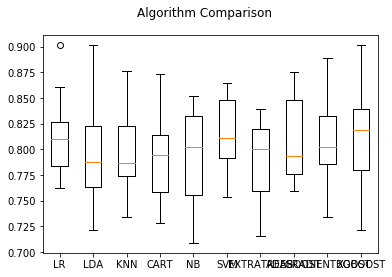

In [4]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('EXTRATREES', ExtraTreesClassifier()))
models.append(('ADABOOST', AdaBoostClassifier()))
models.append(('GRADIENTBOOST', GradientBoostingClassifier()))
models.append(('XGBOOST', xgb.XGBClassifier()))
#models.append(('KMNS', KMeans()))




results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, np.ravel(Y_train), cv=10, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [5]:
#xzz=CatBoostRegressor(iterations=2,learning_rate=1,depth=2)
#xzz.fit(X_train, np.ravel(Y_train),plot=True)

In [6]:


from sklearn import feature_selection
from sklearn import pipeline
from sklearn.grid_search import GridSearchCV


class MyPipe(pipeline.Pipeline):

    def fit(self, X, y=None, **fit_params):
        """Calls last elements .coef_ method.
        Based on the sourcecode for decision_function(X).
        Link: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/pipeline.py
        ----------
        """
        super(MyPipe, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self


#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

# Without Pipeline
est = SVC(kernel="linear")
xx=LogisticRegression()
selector = feature_selection.RFE(xx)
clf = GridSearchCV(selector, param_grid={'estimator__C': [1, 10, 100],'estimator__penalty': ['l1','l2']},cv=10)
clf.fit(X_train,np.ravel(Y_train))
print(clf.grid_scores_)
print(clf.best_estimator_.estimator_)
print(clf.best_estimator_.ranking_)

clf.best_estimator_.n_features_


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[mean: 0.80625, std: 0.04013, params: {'estimator__C': 1, 'estimator__penalty': 'l1'}, mean: 0.80625, std: 0.04013, params: {'estimator__C': 1, 'estimator__penalty': 'l2'}, mean: 0.79875, std: 0.04223, params: {'estimator__C': 10, 'estimator__penalty': 'l1'}, mean: 0.80125, std: 0.04309, params: {'estimator__C': 10, 'estimator__penalty': 'l2'}, mean: 0.79750, std: 0.04168, params: {'estimator__C': 100, 'estimator__penalty': 'l1'}, mean: 0.80125, std: 0.04309, params: {'estimator__C': 100, 'estimator__penalty': 'l2'}]
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[1 6 3 4 2 1 5 1 1]


4

In [7]:

from sklearn import feature_selection
from sklearn import pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC


class MyPipe(pipeline.Pipeline):

    def fit(self, X, y=None, **fit_params):
        """Calls last elements .coef_ method.
        Based on the sourcecode for decision_function(X).
        Link: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/pipeline.py
        ----------
        """
        super(MyPipe, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self


#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

# Without Pipeline
est = SVC(kernel="linear")

selector = feature_selection.RFE(est)
clf = GridSearchCV(selector, param_grid={'estimator__C': [1, 10, 100]},cv=10)
clf.fit(X_train,np.ravel(Y_train))
print(clf.grid_scores_)
print(clf.best_estimator_.estimator_)
print(clf.best_estimator_.ranking_)

clf.best_estimator_.n_features_









[mean: 0.80125, std: 0.05070, params: {'estimator__C': 1}, mean: 0.80125, std: 0.05070, params: {'estimator__C': 10}, mean: 0.80125, std: 0.05070, params: {'estimator__C': 100}]
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[3 1 4 2 6 1 5 1 1]


4

In [8]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn import feature_selection
from sklearn import pipeline
from sklearn.grid_search import GridSearchCV




#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

# Without Pipeline
clf1 = KNeighborsClassifier()
clf = GridSearchCV(clf1, param_grid={'n_neighbors': [
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,35,40,45,50,100],'leaf_size': [
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,35,40,45,50,100]},cv=10)
clf.fit(X_train,np.ravel(Y_train))
print(clf.grid_scores_)
print("\n\n\n\n")
print(clf.best_estimator_)









[mean: 0.74125, std: 0.04903, params: {'n_neighbors': 1, 'leaf_size': 1}, mean: 0.74125, std: 0.04753, params: {'n_neighbors': 2, 'leaf_size': 1}, mean: 0.79750, std: 0.03922, params: {'n_neighbors': 3, 'leaf_size': 1}, mean: 0.78625, std: 0.03385, params: {'n_neighbors': 4, 'leaf_size': 1}, mean: 0.79750, std: 0.04074, params: {'n_neighbors': 5, 'leaf_size': 1}, mean: 0.79250, std: 0.03726, params: {'n_neighbors': 6, 'leaf_size': 1}, mean: 0.79625, std: 0.03402, params: {'n_neighbors': 7, 'leaf_size': 1}, mean: 0.79750, std: 0.03763, params: {'n_neighbors': 8, 'leaf_size': 1}, mean: 0.80500, std: 0.04232, params: {'n_neighbors': 9, 'leaf_size': 1}, mean: 0.79625, std: 0.04522, params: {'n_neighbors': 10, 'leaf_size': 1}, mean: 0.80250, std: 0.03816, params: {'n_neighbors': 11, 'leaf_size': 1}, mean: 0.79500, std: 0.03951, params: {'n_neighbors': 12, 'leaf_size': 1}, mean: 0.79875, std: 0.03808, params: {'n_neighbors': 13, 'leaf_size': 1}, mean: 0.79875, std: 0.03559, params: {'n_neigh

In [9]:



from sklearn import feature_selection
from sklearn import pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier


class MyPipe(pipeline.Pipeline):

    def fit(self, X, y=None, **fit_params):
        """Calls last elements .coef_ method.
        Based on the sourcecode for decision_function(X).
        Link: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/pipeline.py
        ----------
        """
        super(MyPipe, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self


#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

# Without Pipeline
est = RandomForestClassifier()

selector = feature_selection.RFE(est)
clf = GridSearchCV(selector, param_grid={'estimator__n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30]},cv=10)
clf.fit(X_train,np.ravel(Y_train))
print(clf.grid_scores_,sep='\n')
print(clf.best_estimator_.estimator_)
print(clf.best_estimator_.ranking_)







[mean: 0.79000, std: 0.05119, params: {'estimator__n_estimators': 1}, mean: 0.81250, std: 0.04833, params: {'estimator__n_estimators': 2}, mean: 0.80875, std: 0.03243, params: {'estimator__n_estimators': 3}, mean: 0.79125, std: 0.02903, params: {'estimator__n_estimators': 4}, mean: 0.80625, std: 0.03715, params: {'estimator__n_estimators': 5}, mean: 0.81375, std: 0.03957, params: {'estimator__n_estimators': 6}, mean: 0.81750, std: 0.02881, params: {'estimator__n_estimators': 7}, mean: 0.80125, std: 0.03480, params: {'estimator__n_estimators': 8}, mean: 0.81125, std: 0.03485, params: {'estimator__n_estimators': 9}, mean: 0.80375, std: 0.04224, params: {'estimator__n_estimators': 10}, mean: 0.81000, std: 0.03250, params: {'estimator__n_estimators': 11}, mean: 0.80375, std: 0.03854, params: {'estimator__n_estimators': 12}, mean: 0.80250, std: 0.03762, params: {'estimator__n_estimators': 13}, mean: 0.79375, std: 0.04466, params: {'estimator__n_estimators': 14}, mean: 0.80000, std: 0.03572,

In [10]:



from sklearn import feature_selection
from sklearn import pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier


class MyPipe(pipeline.Pipeline):

    def fit(self, X, y=None, **fit_params):
        """Calls last elements .coef_ method.
        Based on the sourcecode for decision_function(X).
        Link: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/pipeline.py
        ----------
        """
        super(MyPipe, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self


#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

# Without Pipeline
est = ExtraTreesClassifier()

selector = feature_selection.RFE(est)
clf = GridSearchCV(selector, param_grid={'estimator__n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30]},cv=10)
clf.fit(X_train,np.ravel(Y_train))
print(clf.grid_scores_,sep='\n')
print(clf.best_estimator_.estimator_)
print(clf.best_estimator_.ranking_)






[mean: 0.80125, std: 0.03778, params: {'estimator__n_estimators': 1}, mean: 0.82000, std: 0.03736, params: {'estimator__n_estimators': 2}, mean: 0.81125, std: 0.03620, params: {'estimator__n_estimators': 3}, mean: 0.80875, std: 0.02378, params: {'estimator__n_estimators': 4}, mean: 0.80625, std: 0.02714, params: {'estimator__n_estimators': 5}, mean: 0.81375, std: 0.02904, params: {'estimator__n_estimators': 6}, mean: 0.80875, std: 0.03790, params: {'estimator__n_estimators': 7}, mean: 0.80500, std: 0.03110, params: {'estimator__n_estimators': 8}, mean: 0.81375, std: 0.03044, params: {'estimator__n_estimators': 9}, mean: 0.80500, std: 0.03464, params: {'estimator__n_estimators': 10}, mean: 0.81000, std: 0.03695, params: {'estimator__n_estimators': 11}, mean: 0.80000, std: 0.03568, params: {'estimator__n_estimators': 12}, mean: 0.80375, std: 0.03218, params: {'estimator__n_estimators': 13}, mean: 0.80625, std: 0.03743, params: {'estimator__n_estimators': 14}, mean: 0.79750, std: 0.03390,

In [11]:


from sklearn import feature_selection
from sklearn import pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier


class MyPipe(pipeline.Pipeline):

    def fit(self, X, y=None, **fit_params):
        """Calls last elements .coef_ method.
        Based on the sourcecode for decision_function(X).
        Link: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/pipeline.py
        ----------
        """
        super(MyPipe, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self


#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

# Without Pipeline
est = AdaBoostClassifier()

selector = feature_selection.RFE(est)
clf = GridSearchCV(selector, param_grid={'estimator__n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,35,40,45,50,55,60]},cv=10)
clf.fit(X_train,np.ravel(Y_train))
print(clf.grid_scores_,sep='\n')
print(clf.best_estimator_.estimator_)
print(clf.best_estimator_.ranking_)







[mean: 0.79625, std: 0.05010, params: {'estimator__n_estimators': 1}, mean: 0.79625, std: 0.05010, params: {'estimator__n_estimators': 2}, mean: 0.79250, std: 0.04643, params: {'estimator__n_estimators': 3}, mean: 0.81000, std: 0.04859, params: {'estimator__n_estimators': 4}, mean: 0.79250, std: 0.04093, params: {'estimator__n_estimators': 5}, mean: 0.80250, std: 0.03668, params: {'estimator__n_estimators': 6}, mean: 0.79875, std: 0.04243, params: {'estimator__n_estimators': 7}, mean: 0.79500, std: 0.03610, params: {'estimator__n_estimators': 8}, mean: 0.79250, std: 0.04180, params: {'estimator__n_estimators': 9}, mean: 0.78375, std: 0.04429, params: {'estimator__n_estimators': 10}, mean: 0.79500, std: 0.04562, params: {'estimator__n_estimators': 11}, mean: 0.75875, std: 0.04892, params: {'estimator__n_estimators': 12}, mean: 0.76125, std: 0.04688, params: {'estimator__n_estimators': 13}, mean: 0.75625, std: 0.04666, params: {'estimator__n_estimators': 14}, mean: 0.75625, std: 0.04666,

In [12]:




#we will have to use all features in gaussian naive bayes
from sklearn import feature_selection
from sklearn import pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

#from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier


class MyPipe(pipeline.Pipeline):

    def fit(self, X, y=None, **fit_params):
        """Calls last elements .coef_ method.
        Based on the sourcecode for decision_function(X).
        Link: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/pipeline.py
        ----------
        """
        super(MyPipe, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self


#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

# Without Pipeline
est = GaussianNB()

score=cross_val_score(est,X_train,Y_train,cv=10)
print(score)
#print(clf.grid_scores_,sep='\n')
#print(clf.best_estimator_.estimator_)
#print(clf.best_estimator_.ranking_)





[0.80246914 0.85185185 0.80246914 0.83950617 0.85       0.75
 0.7721519  0.74683544 0.81012658 0.70886076]


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:

from sklearn import feature_selection
from sklearn import pipeline
from sklearn.grid_search import GridSearchCV
import xgboost as xgb
#from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier


class MyPipe(pipeline.Pipeline):

    def fit(self, X, y=None, **fit_params):
        """Calls last elements .coef_ method.
        Based on the sourcecode for decision_function(X).
        Link: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/pipeline.py
        ----------
        """
        super(MyPipe, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self


#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

# Without Pipeline
est = xgb.XGBClassifier()

selector = feature_selection.RFE(est)
clf = GridSearchCV(selector, param_grid={'estimator__n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]},cv=10)
clf.fit(X_train,np.ravel(Y_train))
print(clf.grid_scores_,sep='\n')
print(clf.best_estimator_.estimator_)
print(clf.best_estimator_.ranking_)


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi